## 2.2.1 XOR Circuit

In digital technology, the phase detector can be implemented by an XOR circuit, such as in
the case of NXP’s HEF4046BT PLL IC from the first experiment portion.

### 1.- Draw starting from two equal-frequency, phase-shifted square-wave signals uR(t) and uV(t), plot the output voltage of the phase detector uD(t) at a phase shift of Φ = ϕR−ϕV = 0◦, 90◦, -90◦.

### 2.- What is the frequency of the output voltage uD(t) compared to the two input signals of the same frequency if there is a phase shift?

### 1.- Draw starting from two equal-frequency, phase-shifted square-wave signals uR(t) and uV(t), plot the output voltage of the phase detector uD(t) at a phase shift of Φ = ϕR−ϕV = 0◦, 90◦, -90◦.

To generate the plots, the behavior of the circuit is generated via Simulink {file named DigitalCircuits.mls}. The chosen parameters are a duty cycle of 50% for the 3 cases and the corresponding plots are:

#### No phase difference:

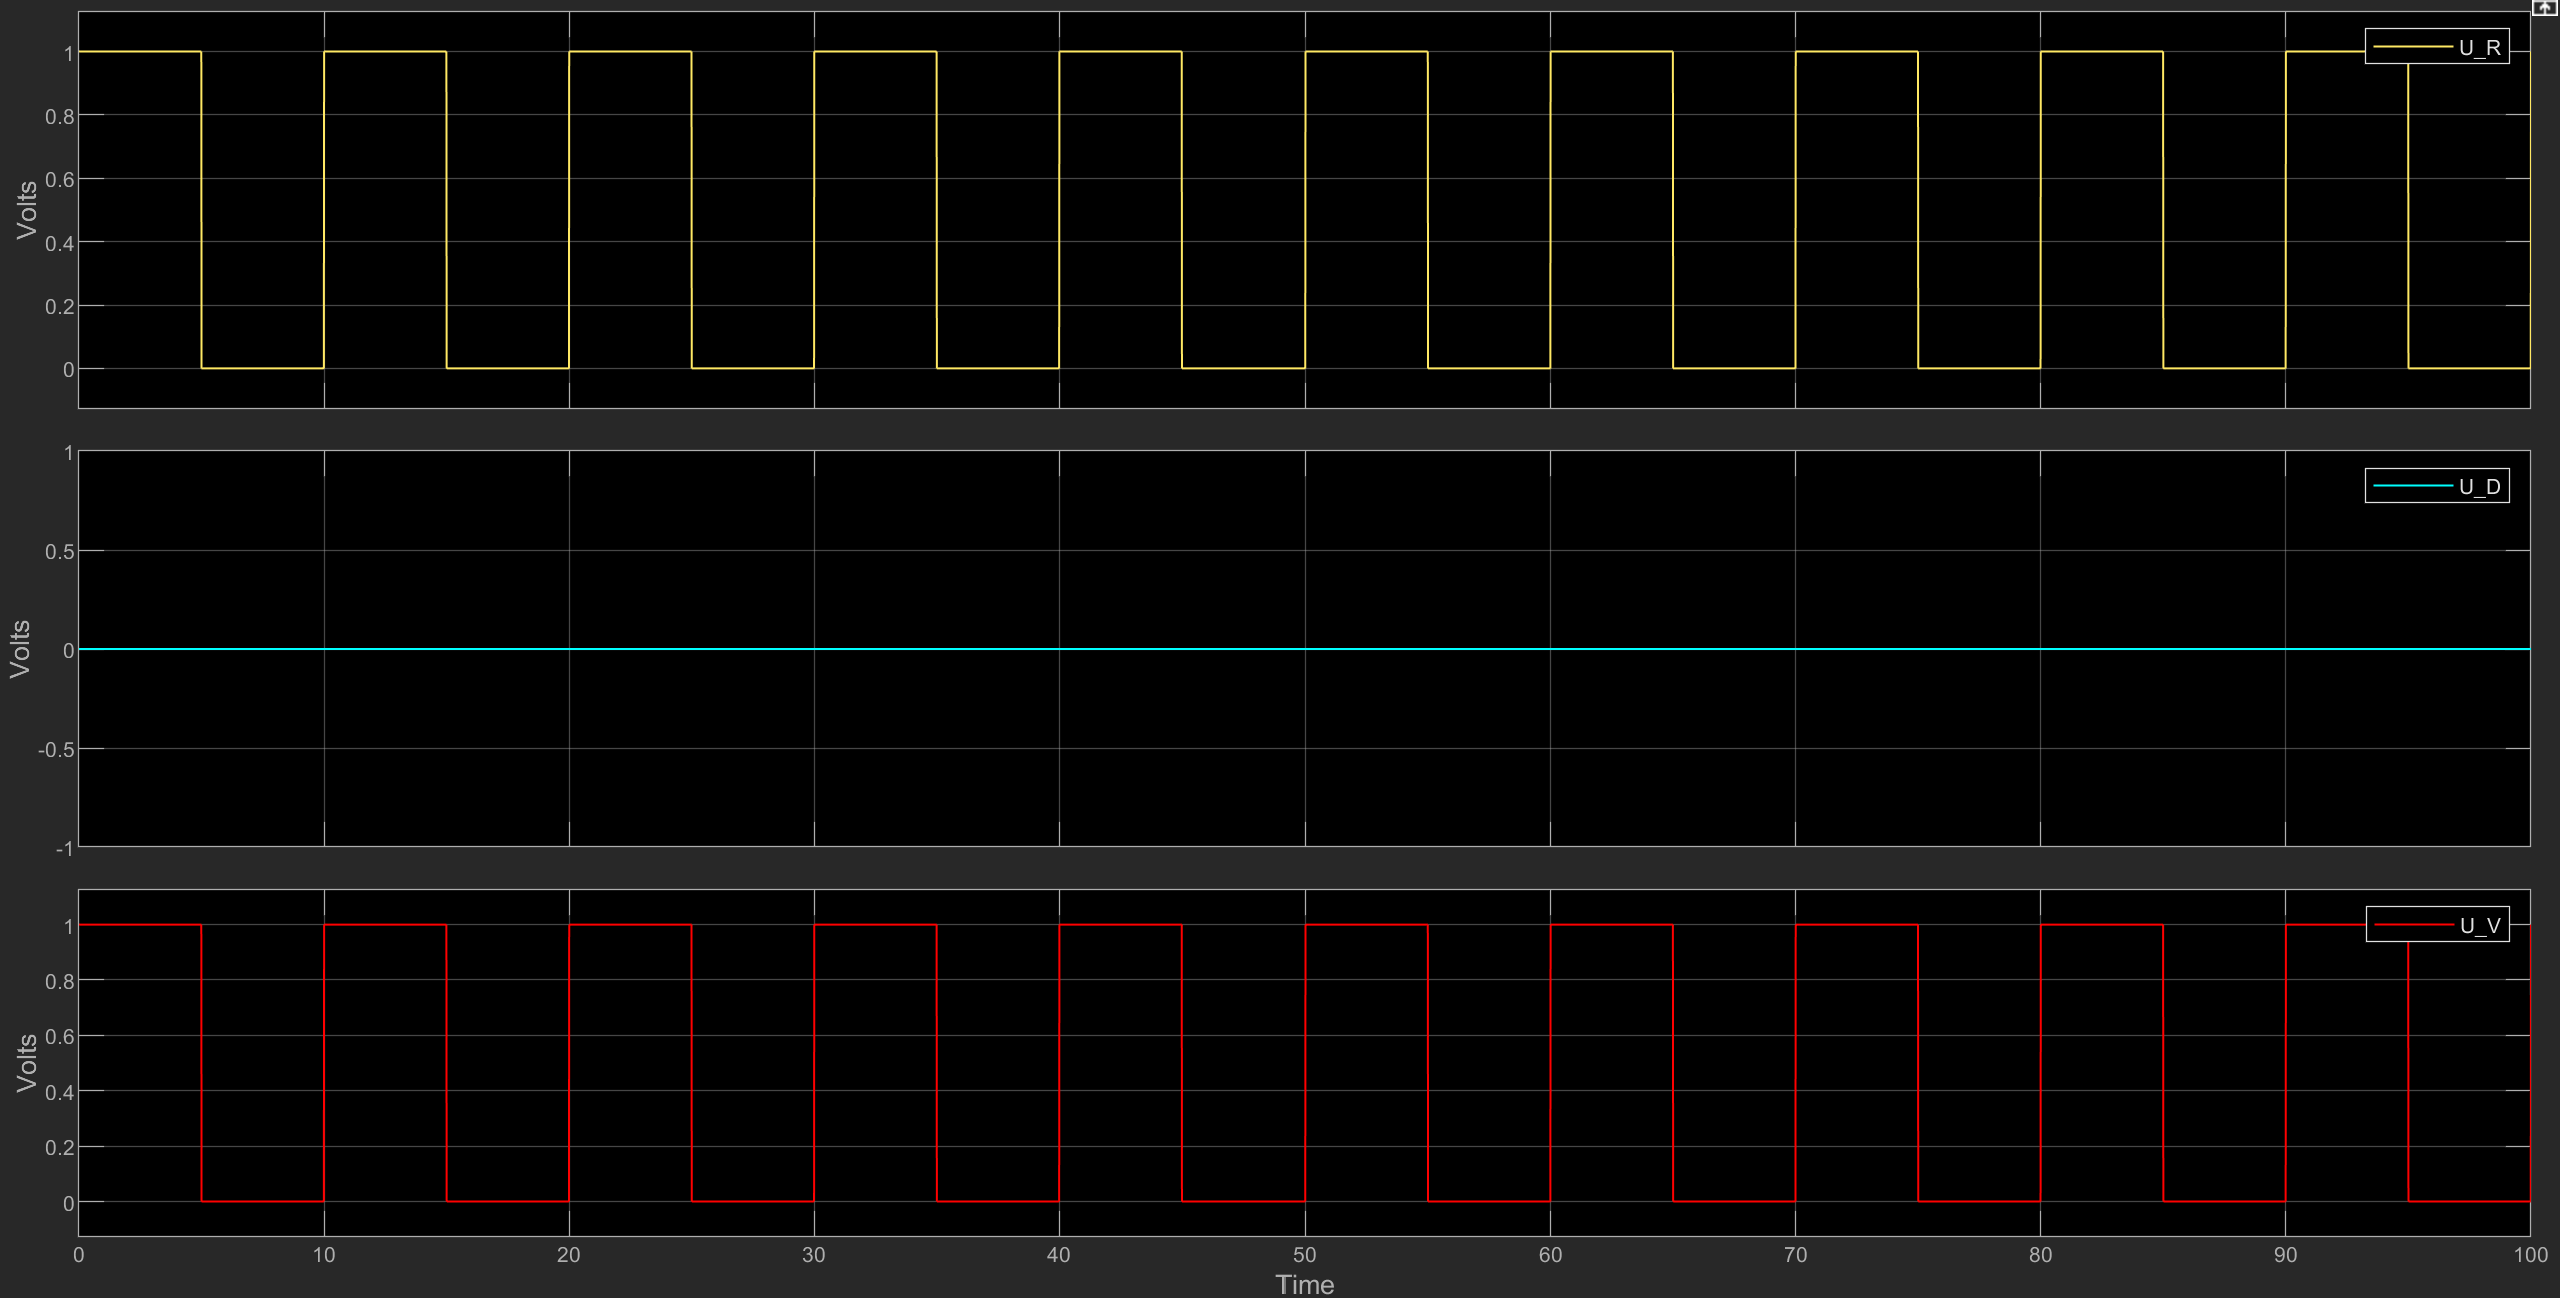

### 2.- What is the frequency of the output voltage uD(t) compared to the two input signals of the same frequency if there is a phase shift?

### 3.- Determine the time average uF after the control filter for all three cases.

The first step is obtaining the governing equation of the overall circuit. Considering the transfer function of the filter: 

$H(s) = \frac{v_2(t)}{v_1(t)} = \frac{sR_2 C}{s(R_1 C + R_2 C)}$

We obtain:

$v_2(t)= \frac{sR_2 C}{s(R_1 C + R_2 C)}v_1(t)$

Now, using the inverse Laplace transfrom the expression for $v_2(t)$ becomes the output of the following code cell:

In [14]:
import sympy as sp
from sympy import symbols, Function, Eq, inverse_laplace_transform
from IPython.display import display  # ← THIS is the correct display()

# Define symbols
s, t = symbols('s t', real=True)
R1, R2, C = symbols('R1 R2 C', positive=True)
V1 = Function('V1')(s)
v2 = Function('v_2')(t)

# Transfer function
H = (R2*C*s + 1) / ((R1 + R2)*C*s + 1)
V2 = H * V1

# Display full inverse Laplace result
display(Eq(v2, inverse_laplace_transform(V2, s, t)))

Eq(v_2(t), C*R2*Derivative(InverseLaplaceTransform(V1(s)/(C*s*(R1 + R2) + 1), s, t, _None), t) + InverseLaplaceTransform(V1(s)/(C*s*(R1 + R2) + 1), s, t, _None))

The $L^{-1}$ represents the inverse Laplace transform. Now for solving the equation when the input is a square wave (here represented by a Heaviside function $\theta$).

The squared wave is generated by the XOR gate, where the duty cycle is dependent on the phase difference between the two signals fed into the XOR gate.

The expression of $v_2(t)$ becomes the output of the following code cell:

In [11]:
# Define symbols
t, s, A, T, D = sp.symbols('t s A T D', positive=True, real=True)
R1, R2, C = sp.symbols('R1 R2 C', positive=True)
v2 = sp.Function('v_2')(t)

# Step 1: Define v1(t) as a single square pulse with duration D*T
v1_t = A * (sp.Heaviside(t) - sp.Heaviside(t - D*T))

# Step 2: Laplace transform of the input
V1s = sp.laplace_transform(v1_t, t, s, noconds=True)

# Step 3: Define the system transfer function H(s)
H = (R2*C*s + 1) / ((R1 + R2)*C*s + 1)

# Step 4: Multiply to get output in Laplace domain
V2s = sp.simplify(H * V1s)

# Step 5: Inverse Laplace transform to get v2(t)
v2_t = sp.simplify(sp.inverse_laplace_transform(V2s, s, t))

# Display the result
display(sp.simplify(sp.Eq(v2, v2_t)))


Eq(v_2(t), A*(-R1*exp(t/(C*(R1 + R2)))*Heaviside(-D*T + t) + R1*exp(t/(C*(R1 + R2))) + R1*exp(D*T/(C*(R1 + R2)))*Heaviside(-D*T + t) - R1 - R2*exp(t/(C*(R1 + R2)))*Heaviside(-D*T + t) + R2*exp(t/(C*(R1 + R2))))*exp(-t/(C*(R1 + R2)))/(R1 + R2))

For obtaining the average value of the output voltage from the filter, it is necessary to integrate $v_2(t)$ over one period and divide it by the period:

$\hat{v_2(t)}=\frac{1}{T}\int_{0}^{T} v_2(t) dt$

Where:

$T = \frac{T_{HIGH}}{D}$

Where D is the duty cycle.

To compute that value, the following code cell is used:


In [16]:
# Define symbols
t, s, A, T, D = sp.symbols('t s A T D', positive=True, real=True)
R1, R2, C = sp.symbols('R1 R2 C', positive=True)
v2 = sp.Function('v_2')(t)

# Step 1: Define v1(t) as a single square pulse of duration D*T
v1_t = A * (sp.Heaviside(t) - sp.Heaviside(t - D*T))

# Step 2: Laplace transform of v1(t)
V1s = sp.laplace_transform(v1_t, t, s, noconds=True)

# Step 3: Define transfer function of the lag-lead filter
H = (R2*C*s + 1) / ((R1 + R2)*C*s + 1)

# Step 4: Output in Laplace domain
V2s = sp.simplify(H * V1s)

# Step 5: Inverse Laplace to get v2(t)
v2_t = sp.simplify(sp.inverse_laplace_transform(V2s, s, t))

# Step 6: Compute average value over one full period T
v2_avg = sp.simplify(1 / T * sp.integrate(v2_t, (t, 0, T)))

# Step 7: Display the result
display(sp.simplify(sp.Eq(sp.Symbol('v_{2,avg}'), v2_avg)))

Eq(v_{2,avg}, A*(C*R1*(R1 + R2)*(exp(T/(C*(R1 + R2))) - exp(D*T/(C*(R1 + R2))))*Heaviside(T*(1 - D)) - C*R1*(R1 + R2)*exp(T/(C*(R1 + R2))) + C*R1*(R1 + R2) + T*(R1*(D - 1)*Heaviside(T*(1 - D)) + R1 + R2*(D - 1)*Heaviside(T*(1 - D)) + R2)*exp(T/(C*(R1 + R2))))*exp(-T/(C*(R1 + R2)))/(T*(R1 + R2)))

Lastly, plotting 1 cycle of the expression we obtain: 

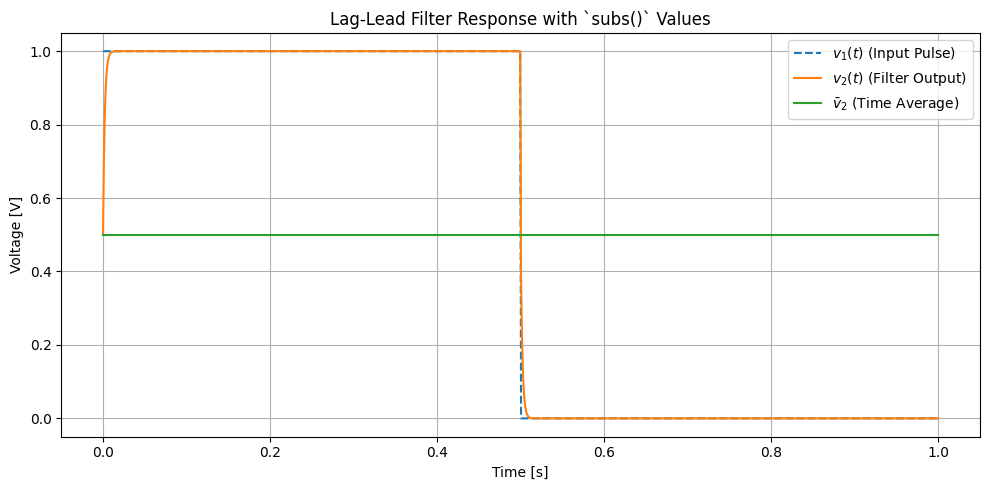

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define symbols
t, s, A, T, D = sp.symbols('t s A T D', real=True, positive=True)
R1, R2, C = sp.symbols('R1 R2 C', positive=True)
v2 = sp.Function('v_2')(t)

# Step 2: Define v1(t): square pulse from 0 to D*T
v1_expr = A * (sp.Heaviside(t) - sp.Heaviside(t - D*T))

# Step 3: Laplace transform of v1(t)
V1s = sp.laplace_transform(v1_expr, t, s, noconds=True)

# Step 4: Transfer function H(s)
H = (R2*C*s + 1) / ((R1 + R2)*C*s + 1)

# Step 5: V2(s) and inverse Laplace
V2s = sp.simplify(H * V1s)
v2_expr = sp.simplify(sp.inverse_laplace_transform(V2s, s, t))

# Step 6: Average value over one period
v2_avg_expr = sp.simplify(1 / T * sp.integrate(v2_expr, (t, 0, T)))

# Step 7: Substitute numerical values
values = {
    A: 1,
    T: 1,
    D: 0.5,
    R1: 1e3,
    R2: 1e3,
    C: 1e-6
}

v1_expr_num = v1_expr.subs(values)
v2_expr_num = v2_expr.subs(values)
v2_avg_val = float(v2_avg_expr.subs(values))

# Step 8: Lambdify with explicit vector handling
heaviside = lambda x: np.heaviside(x, 1)
v1_func = sp.lambdify(t, v1_expr_num, modules=["numpy", {"Heaviside": heaviside}])
v2_func = sp.lambdify(t, v2_expr_num, modules=["numpy", {"Heaviside": heaviside}])

# Step 9: Evaluate and plot
t_vals = np.linspace(0, float(values[T]), 1000)
v1_vals = np.array([v1_func(ti) for ti in t_vals])
v2_vals = np.array([v2_func(ti) for ti in t_vals])
v2_avg_line = np.full_like(t_vals, v2_avg_val)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(t_vals, v1_vals, '--', label=r'$v_1(t)$ (Input Pulse)')
plt.plot(t_vals, v2_vals, label=r'$v_2(t)$ (Filter Output)')
plt.plot(t_vals, v2_avg_line, label=r'$\bar{v}_2$ (Time Average)')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.title('Lag-Lead Filter Response with `subs()` Values')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


From the plot, it can be observed that the average voltage is the amplitude of the output generated by the XOR gate and multiplied by the duty cycle.

### 4.- Plot uF(Φ) versus the phase shift Φ = ϕR−ϕV for −180◦ ≤ Φ ≤ 180◦.